In [4]:
!pip install openpyxl
!pip install optuna


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\bychk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\bychk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA

In [6]:
train = pd.read_excel("train.xlsx").drop(columns="Unnamed: 0")
test = pd.read_excel("test.xlsx").drop(columns="Unnamed: 0")

In [7]:
# Посмотрим как выглядят наши таблицы
train.head()

,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [8]:
test.head()

,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",NaN,...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",NaN,...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",NaN,...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",NaN,...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",NaN,...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


# Обработаем пропуски, построим графики и причешим данные




In [9]:
# удалим стобцы, в которых заполнено меньше 5% значений(скорее всего они будут лишь шумом, если что добавим их потом) в train dataset
excess_columns = train.loc[:, train.isna().mean() > 0.95].columns
train.drop(columns=excess_columns, inplace=True)
test.drop(columns=excess_columns, inplace=True)

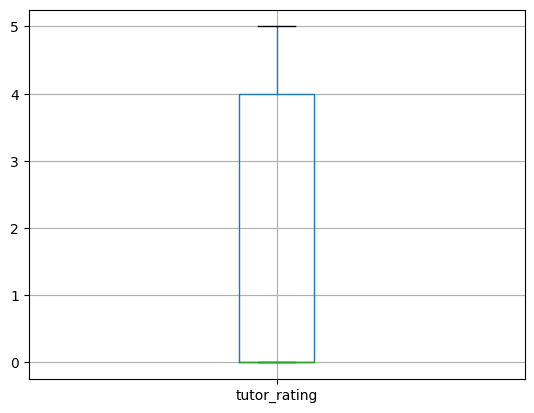

In [10]:
# Построим график с усами и заполним медианными значениями колонку tutor_rating
train.boxplot("tutor_rating")
train.tutor_rating = train.tutor_rating.fillna(train.tutor_rating.median())
test.tutor_rating = test.tutor_rating.fillna(test.tutor_rating.median())

In [11]:
# таким же образом сделаю и для других числовых колонок
train.boxplot("tutor_reviews")
train.tutor_reviews = train.tutor_reviews.fillna(train.tutor_reviews.median())
test.tutor_reviews = test.tutor_reviews.fillna(test.tutor_reviews.median())

In [12]:
train.experience = train.experience.fillna('0 лет опыта')
train.experience = train.experience.apply(lambda x: int(x.split()[0])) # преобразуем experience в числовой формат для удобства
# обработаем выбросы через 1,5 * IQR
q1 = train['experience'].quantile(0.25)
q3 = train['experience'].quantile(0.75)
iqr = q3 - q1
train = train[train['experience'].between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)]
train.boxplot('experience')

# аналогично для теста, но без удаления выбросов)
test.experience = test.experience.fillna('0 лет опыта')
test.experience = test.experience.apply(lambda x: int(x.split()[0]))

In [13]:
# рассмотрим таргет mean_price признак и уберем (при наличии) выбросы из них методом 1.5 * IQR
train.boxplot("mean_price") # видим, что на графике есть выбросы, удалим их
q1 = train['mean_price'].quantile(0.25)
q3 = train['mean_price'].quantile(0.75)
iqr = q3 - q1
train = train[train['mean_price'].between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)]
# из соображений логики, возможно данных нет тк оценок  нет и можно заполнить 0, но пока так

In [14]:
train.isna().sum()

предмет                0
ФИО                    0
tutor_head_tags        0
tutor_rating           0
tutor_reviews          0
description            1
experience_desc     2099
Education_1            0
Desc_Education_1      72
Education_2         3310
Desc_Education_2    3313
status                12
experience             0
categories             0
mean_price             0
dtype: int64

In [15]:
# Объединим все текстовые признаки в один, чтобы потом посчитать по ним статистики, разделим их пробелом и заполним словом "неизвестно" пропущенные значения
text_cols = ['description', 'experience_desc', 'Education_1', 'Desc_Education_1', 'Education_2', 'Desc_Education_2', 'status']
train[text_cols] = train[text_cols].fillna('неизвестно')
test[text_cols] = test[text_cols].fillna('неизвестно')
train['description'] += ' ' + train['experience_desc'] + ' ' + train['Education_1'] + ' ' + train['Desc_Education_1'] + ' ' + train['Education_2'] + ' ' + train['Desc_Education_2'] + ' ' + train['status']
test['description'] += ' ' + test['experience_desc'] + ' ' + test['Education_1'] + ' ' + test['Desc_Education_1'] + ' ' + test['Education_2'] + ' ' + test['Desc_Education_2'] + ' ' + test['status']

In [16]:
train.isna().sum()

предмет             0
ФИО                 0
tutor_head_tags     0
tutor_rating        0
tutor_reviews       0
description         0
experience_desc     0
Education_1         0
Desc_Education_1    0
Education_2         0
Desc_Education_2    0
status              0
experience          0
categories          0
mean_price          0
dtype: int64

# Шаг 2: Feature engineering

In [17]:
# вытащим несколько фичей из колонки tutor_head_tags
train.tutor_head_tags = train.tutor_head_tags.apply(lambda x: eval(x))
train['school'] = train.tutor_head_tags.apply(lambda x: 1 if 'Школьная программа' in x else 0)
train['ege'] = train.tutor_head_tags.apply(lambda x: 1 if 'Подготовка к ЕГЭ' in x else 0)
train['oge'] = train.tutor_head_tags.apply(lambda x: 1 if 'Подготовка к ОГЭ' in x else 0)
train['geom'] = train.tutor_head_tags.apply(lambda x: 1 if ' Аналитическая геометрия' in x else 0)
train['matan'] = train.tutor_head_tags.apply(lambda x: 1 if 'Математический анализ' in x else 0)
train['linal'] = train.tutor_head_tags.apply(lambda x: 1 if 'Линейная алгебра' in x else 0)
train['teorver'] = train.tutor_head_tags.apply(lambda x: 1 if 'Теория вероятности и мат. статистика' in x else 0)
train['number_tags'] = train.tutor_head_tags.apply(lambda x: len(x))

# аналогично для теста
test.tutor_head_tags = test.tutor_head_tags.apply(lambda x: eval(x))
test['school'] = test.tutor_head_tags.apply(lambda x: 1 if 'Школьная программа' in x else 0)
test['ege'] = test.tutor_head_tags.apply(lambda x: 1 if 'Подготовка к ЕГЭ' in x else 0)
test['oge'] = test.tutor_head_tags.apply(lambda x: 1 if 'Подготовка к ОГЭ' in x else 0)
test['geom'] = test.tutor_head_tags.apply(lambda x: 1 if ' Аналитическая геометрия' in x else 0)
test['matan'] = test.tutor_head_tags.apply(lambda x: 1 if 'Математический анализ' in x else 0)
test['linal'] = test.tutor_head_tags.apply(lambda x: 1 if 'Линейная алгебра' in x else 0)
test['teorver'] = test.tutor_head_tags.apply(lambda x: 1 if 'Теория вероятности и мат. статистика' in x else 0)
test['number_tags'] = test.tutor_head_tags.apply(lambda x: len(x))

In [18]:
train.head()

,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,categories,mean_price,school,ege,oge,geom,matan,linal,teorver,number_tags
1,matematika,Репетитор по математике Назарова Анастасия Ан...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",4.0,7,Репетитор не предоставил о себе дополн...,неизвестно,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,1,1,1,0,0,0,0,3
2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,...,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,1,1,1,0,0,0,0,3
3,matematika,Репетитор по математике Логинова Елизавета Ал...,"[Школьная программа, Математический анализ, По...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",неизвестно,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",неизвестно,...,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,1,1,1,0,1,1,1,8
4,matematika,Репетитор по математике Харланов Олег Викторо...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",неизвестно,...,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,1,1,1,0,0,0,0,3
5,matematika,Репетитор по математике Позябин Дмитрий Евген...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,Репетитор не предоставил о себе дополн...,неизвестно,Московский государственный технический универ...,"Год окончания: 2019, Факультет: факультет эне...",неизвестно,...,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",16.666667,1,1,1,0,0,0,0,3


In [19]:
# Обработаем текст с помощью TF-IDF а затем сожмем с пмоощью SVD
tf_idf = TfidfVectorizer()
svd = TruncatedSVD(n_components=24)
embs = tf_idf.fit_transform(train['description'])
svd_embs = svd.fit_transform(embs)
train[[f'e_{i}' for i in range(svd_embs.shape[1])]] = svd_embs

embs = tf_idf.transform(test['description'])
svd_embs = svd.transform(embs)
test[[f'e_{i}' for i in range(svd_embs.shape[1])]] = svd_embs

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = train.select_dtypes(include=numerics).columns
cat_features = train.select_dtypes(include='object').columns
# sns.pairplot(train[numeric_columns])

# Проверка статистических гипотез

In [21]:
# Гиптотеза 1:
# Нулевая гипотеза: mean_price распределен нормально, конкурирущая гипотеза - mean_price распределен нормально, alpha=0.01

In [22]:
shapiro(train['mean_price'])

ShapiroResult(statistic=0.9707310199737549, pvalue=8.855638699551365e-28)

In [23]:
# p_value < alpha, поэтому нулевая гипотеза неверна

In [24]:
# Гиптотеза 2:
# Нулевая гипотеза: tutor_rating распределен нормально, конкурирущая гипотеза - tutor_rating распределен нормально, alpha=0.01

In [25]:
shapiro(train['tutor_rating'])

ShapiroResult(statistic=0.635645866394043, pvalue=0.0)

In [26]:
# p_value < alpha, поэтому нулевая гипотеза неверна

In [27]:
# Гиптотеза 3:
# Нулевая гипотеза: e_0 распределен нормально, конкурирущая гипотеза - experience распределен нормально, alpha=0.01

In [28]:
shapiro(train['e_0'])

ShapiroResult(statistic=0.8262951374053955, pvalue=0.0)

In [29]:
# p_value < alpha, поэтому нулевая гипотеза неверна

In [30]:
# Гиптотеза 4:
# Нулевая гипотеза: e_1 распределен нормально, конкурирущая гипотеза - e_0 распределен нормально, alpha=0.e_1

In [31]:
shapiro(train['e_1'])

ShapiroResult(statistic=0.9267968535423279, pvalue=2.2923421188350385e-40)

In [32]:
# p_value < alpha, поэтому нулевая гипотеза неверна

In [33]:
# сохраним train и test для тренировке моделей

train.to_csv("final_train.csv", index=None)
test.to_csv("final_test.csv", index=None)

In [34]:
train.columns

Index(['предмет', 'ФИО', 'tutor_head_tags', 'tutor_rating', 'tutor_reviews',
       'description', 'experience_desc', 'Education_1', 'Desc_Education_1',
       'Education_2', 'Desc_Education_2', 'status', 'experience', 'categories',
       'mean_price', 'school', 'ege', 'oge', 'geom', 'matan', 'linal',
       'teorver', 'number_tags', 'e_0', 'e_1', 'e_2', 'e_3', 'e_4', 'e_5',
       'e_6', 'e_7', 'e_8', 'e_9', 'e_10', 'e_11', 'e_12', 'e_13', 'e_14',
       'e_15', 'e_16', 'e_17', 'e_18', 'e_19', 'e_20', 'e_21', 'e_22', 'e_23'],
      dtype='object')